# Honey Production

## Inspecting Data


In [4]:
import pandas as pd

df_honey_production = pd.read_csv("data/honeyproduction.csv")

df_honey_production.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


### Shape

In [5]:
nr_rows, nr_columns = df_honey_production.shape

print("Number of rows: ", nr_rows)
print("Number of columns: ", nr_columns)

Number of rows:  626
Number of columns:  8


### Data Types

In [6]:
df_honey_production.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

### Missing Values

In [7]:
df_honey_production.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

## Preprocessing

In [15]:
df_honey_production["state"] = df_honey_production["state"].astype("string")

production_per_year = df_honey_production.groupby("year").totalprod.mean().reset_index()

production_per_year.head(10)

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


## Preparing Label Variable

In [16]:
label = production_per_year["year"]

label = label.values.reshape(-1, 1)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


## Preparing Target Variable

In [17]:
target = production_per_year["totalprod"]

target = target.values.reshape(-1, 1)

[[5105093.02325581]
 [4706674.41860465]
 [5106000.        ]
 [4221545.45454545]
 [3892386.36363636]
 [4122090.90909091]
 [4456804.87804878]
 [4243146.34146341]
 [3761902.43902439]
 [3600512.19512195]
 [3974926.82926829]
 [3626700.        ]
 [4382350.        ]
 [3680025.        ]
 [3522675.        ]]


## Visualizing Data to Observe Relationships between Variables

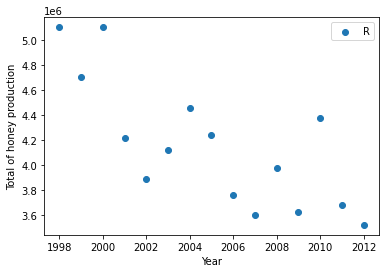

In [19]:
import matplotlib.pyplot as plt

plt.scatter(label, target)
plt.xlabel("Year")
plt.ylabel("Total of honey production")
plt.legend("Relationship between year and honey production")
plt.show()

## Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(label, target)
slope = regression.coef_
intercept = regression.intercept_

print("The slope of the model is: ", *slope[0])
print("The intercept of the model is: ", *intercept)


The slope of the model is:  -88303.18915238192
The intercept of the model is:  181208083.10732976


The predictions of honey production:  [4778311.18087068] [4690007.99171829] [4601704.8025659] [4513401.61341354] [4425098.42426115] [4336795.23510876] [4248492.04595637] [4160188.85680401] [4071885.66765162] [3983582.47849923] [3895279.28934684] [3806976.10019448] [3718672.91104209] [3630369.7218897] [3542066.53273734]


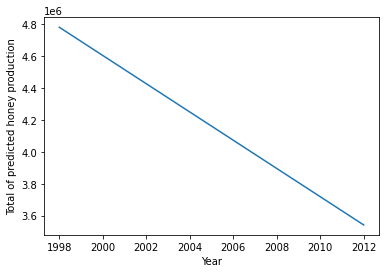

In [27]:
honey_prod_predict = regression.predict(label)

print("The predictions of honey production: ", *honey_prod_predict)

plt.plot(label, honey_prod_predict)
plt.xlabel("Year")
plt.ylabel("Total of predicted honey production")
plt.show()

So, it looks like the production of honey has been in decline, according to this linear model.

## Predict the Honey Decline

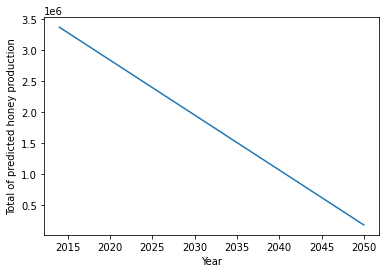

According the Linear Regression model, the predicted honey production for 2050 is  186545.34494683146


In [35]:
import numpy as np

new_years = np.array(range(2014, 2051))

new_years = new_years.reshape(-1, 1)

future_prediction = regression.predict(new_years)

plt.plot(new_years, future_prediction)
plt.xlabel("Year")
plt.ylabel("Total of predicted honey production")
plt.show()

print("According the Linear Regression model, the predicted honey production for 2050 is ", future_prediction[-1][0])